In [1]:
import glob
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime, timezone
from vnstock3 import Vnstock
import requests

In [25]:
stock_list = []
volume_list = []

for i in glob.glob(r'D:\Quantitative_Research\H-Tech\vnstock_data\*.csv'):
    stocks = pd.read_csv(i).set_index('time')['close'].reset_index()
    volume = pd.read_csv(i).set_index('time')['volume'].reset_index()
    stocks.columns = ['time', i[-7:-3]]
    volume.columns = ['time', i[-7:-3]]
    stock_list.append(stocks.set_index('time'))
    volume_list.append(volume.set_index('time'))

stock_universe_price = pd.concat(stock_list, axis = 1).sort_index()
stock_universe_vol = pd.concat(volume_list, axis = 1).sort_index()

In [26]:
stock_universe_price.rename(columns=lambda x: x[:-1] if x != 'time' else x, inplace=True)
stock_universe_price.index = pd.to_datetime(stock_universe_price.index)
stock_universe_price

,A32,AAA,AAM,AAS,AAT,AAV,ABB,ABC,ABI,ABR,...,XHC,XLV,XMC,XMD,XMP,XPH,YBC,YBM,YEG,YTC
time,,,,,,,,,,,,,,,,,,,,,
2013-01-02 07:00:00,NaN,4.00,9.69,NaN,NaN,NaN,NaN,NaN,1.77,NaN,...,NaN,NaN,5.09,NaN,NaN,NaN,14.8,NaN,NaN,NaN
2013-01-03 07:00:00,NaN,3.89,9.46,NaN,NaN,NaN,NaN,NaN,1.77,NaN,...,NaN,NaN,4.80,NaN,NaN,NaN,14.8,NaN,NaN,NaN
2013-01-04 07:00:00,NaN,3.95,9.46,NaN,NaN,NaN,NaN,NaN,1.84,NaN,...,NaN,NaN,5.01,NaN,NaN,NaN,14.8,NaN,NaN,NaN
2013-01-07 07:00:00,NaN,3.92,9.54,NaN,NaN,NaN,NaN,NaN,1.91,NaN,...,NaN,NaN,5.01,NaN,NaN,NaN,14.8,NaN,NaN,NaN
2013-01-08 07:00:00,NaN,3.92,9.85,NaN,NaN,NaN,NaN,NaN,1.80,NaN,...,NaN,NaN,5.01,NaN,NaN,NaN,14.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-18 07:00:00,38.9,12.05,8.22,8.2,3.88,5.8,8.3,13.1,26.47,NaN,...,NaN,8.5,7.30,NaN,NaN,7.0,NaN,11.05,10.90,NaN
2024-07-19 07:00:00,NaN,11.70,8.10,8.0,3.98,5.8,8.1,13.7,26.28,13.50,...,NaN,NaN,7.40,NaN,NaN,7.3,8.9,11.00,11.05,NaN
2024-07-22 07:00:00,35.0,11.70,8.07,7.8,4.01,6.1,8.1,13.1,26.09,13.05,...,NaN,NaN,7.30,NaN,NaN,7.0,NaN,NaN,11.05,40.9


In [27]:
stock_universe_vol.rename(columns=lambda x: x[:-1] if x != 'time' else x, inplace=True)
stock_universe_vol.index = pd.to_datetime(stock_universe_vol.index)
stock_universe_vol

,A32,AAA,AAM,AAS,AAT,AAV,ABB,ABC,ABI,ABR,...,XHC,XLV,XMC,XMD,XMP,XPH,YBC,YBM,YEG,YTC
time,,,,,,,,,,,,,,,,,,,,,
2013-01-02 07:00:00,NaN,774100.0,1940.0,NaN,NaN,NaN,NaN,NaN,8400,NaN,...,NaN,NaN,7600.0,NaN,NaN,NaN,2700.0,NaN,NaN,NaN
2013-01-03 07:00:00,NaN,766100.0,1500.0,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,18500.0,NaN,NaN,NaN,2700.0,NaN,NaN,NaN
2013-01-04 07:00:00,NaN,478300.0,0.0,NaN,NaN,NaN,NaN,NaN,1100,NaN,...,NaN,NaN,6600.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2013-01-07 07:00:00,NaN,748000.0,420.0,NaN,NaN,NaN,NaN,NaN,1000,NaN,...,NaN,NaN,3100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2013-01-08 07:00:00,NaN,468900.0,2010.0,NaN,NaN,NaN,NaN,NaN,200,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-18 07:00:00,500.0,6755000.0,7300.0,446600.0,155500.0,357300.0,765200.0,88300.0,48994,NaN,...,NaN,2400.0,14000.0,NaN,NaN,100.0,NaN,100.0,4046300.0,NaN
2024-07-19 07:00:00,NaN,4318100.0,51000.0,464300.0,12100.0,320000.0,1681100.0,75300.0,88368,7700.0,...,NaN,NaN,3500.0,NaN,NaN,1000.0,200.0,1000.0,2650500.0,NaN
2024-07-22 07:00:00,200.0,6214100.0,300.0,1176700.0,70200.0,891100.0,1904700.0,23000.0,105821,4200.0,...,NaN,NaN,12800.0,NaN,NaN,20200.0,NaN,NaN,2811300.0,100.0


In [28]:
stock = Vnstock().stock()
industries = stock.listing.symbols_by_industries()
industry_counts = industries['en_icb_name3'].value_counts()
valid_industries = industry_counts[industry_counts >= 3].index.tolist()

print(f"Valid industries: {valid_industries}")

valid_industries = list(set(valid_industries))

2024-08-07 09:45:38,429 - vnstock3.common.vnstock - INFO - Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
2024-08-07 09:45:38,438 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


Valid industries: ['Construction & Materials', 'Real Estate Investment & Services', 'Industrial Transportation', 'Food Producers', 'Gas, Water & Multi-utilities', 'Chemicals', 'Personal Goods', 'Support Services', 'Electricity', 'Travel & Leisure', 'Pharmaceuticals & Biotechnology', 'Industrial Metals & Mining', 'Mining', 'Beverages', 'Financial Services', 'Industrial Engineering', 'Media', 'General Industrials', 'Banks', 'General Retailers', 'Electronic & Electrical Equipment', 'Forestry & Paper', 'Automobiles & Parts', 'Technology Hardware & Equipment', 'Software & Computer Services', 'Nonlife Insurance', 'Health Care Equipment & Services', 'Household Goods & Home Construction', 'Oil Equipment, Services & Distribution', 'Fixed Line Telecommunications', 'Food & Drug Retailers', 'Tobacco', 'Oil & Gas Producers', 'Mobile Telecommunications', 'Leisure Goods']


In [63]:
ticker_list = industries[industries['en_icb_name3'] == 'Industrial Transportation']['symbol'].tolist()
available_tickers = [ticker for ticker in ticker_list if ticker in stock_universe_price.columns]
stock_universe = stock_universe_price[available_tickers]
stock_universe = stock_universe.ffill().fillna(0)
stock_universe.index = pd.to_datetime(stock_universe.index)
stock_universe.index = stock_universe.index.date
stock_universe.index.name = 'date'
stock_universe

,CLL,CIA,SGP,IST,CCT,CPI,DNL,CAG,DOP,CDN,...,VFC,VMT,VGP,VIP,VIN,VNA,VST,VTP,WTC,WCS
date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.84,0.0,6.90,2.10,0.0,1.65,2.5,0.0,4.15,19.91
2013-01-03,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.45,0.0,6.73,2.10,0.0,1.65,2.4,0.0,4.15,18.84
2013-01-04,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.45,0.0,6.79,2.07,0.0,1.59,2.5,0.0,4.15,18.84
2013-01-07,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.74,0.0,7.01,2.07,0.0,1.53,2.5,0.0,4.15,18.84
2013-01-08,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.45,0.0,6.56,2.07,0.0,1.59,2.5,0.0,4.15,17.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-18,41.35,11.0,26.5,37.5,9.6,3.8,32.0,8.3,12.0,31.8,...,79.00,22.9,29.40,14.45,18.8,18.10,3.3,81.0,12.60,227.00
2024-07-19,41.60,11.0,25.5,37.5,9.7,3.8,28.0,8.2,12.0,30.7,...,79.00,22.9,29.00,14.35,18.8,17.50,2.9,79.0,12.60,230.00
2024-07-22,41.40,11.0,24.3,36.9,9.6,3.8,28.0,8.3,12.0,31.0,...,79.00,19.5,28.90,13.45,18.8,17.00,2.9,78.5,12.60,230.00


In [64]:
ticker_list = industries[industries['en_icb_name3'] == 'Industrial Transportation']['symbol'].tolist()
available_tickers = [ticker for ticker in ticker_list if ticker in stock_universe_vol.columns]
vol = stock_universe_vol[available_tickers]
vol = vol.fillna(0)
vol.index = pd.to_datetime(vol.index)
vol.index = vol.index.date
vol.index.name = 'date'
vol

,CLL,CIA,SGP,IST,CCT,CPI,DNL,CAG,DOP,CDN,...,VFC,VMT,VGP,VIP,VIN,VNA,VST,VTP,WTC,WCS
date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,7000.0,609770,0.0,139590.0,21430.0,0.0,0.0,100.0
2013-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,0.0,59800.0,575410,0.0,25350.0,51050.0,0.0,0.0,100.0
2013-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,52000.0,204270,0.0,2490.0,4600.0,0.0,0.0,0.0
2013-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4000.0,0.0,1600.0,411310,0.0,58320.0,48640.0,0.0,0.0,0.0
2013-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1130.0,0.0,400.0,761800,0.0,17430.0,15100.0,0.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-18,3400.0,15100.0,351200.0,200.0,1000.0,0.0,100.0,3600.0,100.0,35900.0,...,0.0,0.0,7300.0,641700,0.0,78300.0,0.0,1306200.0,800.0,600.0
2024-07-19,7200.0,1000.0,152200.0,0.0,100.0,15400.0,100.0,17800.0,1100.0,14900.0,...,0.0,0.0,6500.0,459800,0.0,16700.0,135400.0,786700.0,1000.0,600.0
2024-07-22,9200.0,500.0,264600.0,300.0,3300.0,0.0,0.0,10300.0,3700.0,22900.0,...,0.0,2100.0,3600.0,887000,0.0,26200.0,0.0,1063100.0,800.0,1700.0


In [8]:
# import yfinance as yf

# ticker = 'ES=F'
# start_date = '2013-01-01'
# end_date = '2023-07-25'

# data = yf.download(ticker, start=start_date, end=end_date)
# data.index = pd.to_datetime(data.index)
# data.info()

In [9]:
# index_diff1 = stock_universe.index.difference(data.index)
# index_diff2 = data.index.difference(stock_universe.index)

# # Display the differences
# print("Dates in df1 but not in df2:")
# print(index_diff1)

# print("\nDates in df2 but not in df1:")
# print(index_diff2)

In [65]:
average_volume = vol.mean()
sorted_tickers = average_volume.sort_values(ascending=False)
top_3_tickers = sorted_tickers.head(3).index.tolist()
stock_universe = stock_universe[top_3_tickers]
stock_universe

,PVT,GMD,VOS
date,,,
2013-01-02,2.05,6.61,2.40
2013-01-03,2.15,6.61,2.50
2013-01-04,2.19,6.92,2.50
2013-01-07,2.15,6.92,2.50
2013-01-08,2.15,7.24,2.50
...,...,...,...
2024-07-18,29.35,79.90,18.95
2024-07-19,28.50,78.80,17.80
2024-07-22,27.40,78.00,16.65


In [11]:
# full_index = stock_universe.index.union(data.index).sort_values()

# df1_reindexed = stock_universe.reindex(full_index)
# df2_reindexed = data.reindex(full_index)

# stock_universe = df1_reindexed.ffill()
# stock_universe.index = pd.to_datetime(stock_universe.index)
# stock_universe.index = stock_universe.index.date
# stock_universe.index.name = 'date'
# feature = df2_reindexed.ffill()
# feature.index = pd.to_datetime(feature.index)
# feature.index = feature.index.date
# feature.index.name = 'date'

# print("Reindexed and forward-filled stock_universe:")
# print(stock_universe)

# print("\nReindexed and forward-filled data:")
# print(feature)

In [66]:
# feature = feature[['Close']]
# feature_train = feature.iloc[:-252]
# feature_test = feature.iloc[-252:]
stock_universe_train = stock_universe.iloc[:-252]
stock_universe_test = stock_universe.iloc[-252:]

In [67]:
def alpha_signal(df, delta_window=5):
    alpha_df = pd.DataFrame(index=df.index, columns=df.columns)
    
    for col in df.columns:
        delta_close = df[col].diff()
        ts_min = delta_close.rolling(window=delta_window).min()
        ts_max = delta_close.rolling(window=delta_window).max()
        
        alpha_df[col] = np.where(
            ts_min > 0, 
            delta_close, 
            np.where(ts_max < 0, delta_close, -delta_close)
        )
    
    return alpha_df

In [47]:
def orders(df, delta_window=5, threshold = 0):
    ords = pd.DataFrame(0, index=df.index, columns=df.columns)
    alpha_df = alpha_signal(df, delta_window=delta_window)
    for col in df.columns:
        last_order = 0
        holding_period = 0
        days_since_last_sell = 0
        for i in range(1, len(df)):
            if df[col].iloc[i - 1] > 0 and df[col].iloc[i] > 0:
                bull = alpha_df[col].iloc[i - 1] > threshold
                bear = alpha_df[col].iloc[i - 1] < threshold
                
                # print(f"Index {i}, Col {col}, Bull {bull}, Bear {bear}, Last Order {last_order}, Holding Period {holding_period}, Days Since Last Sell {days_since_last_sell}")
                
                if bull:
                    if last_order == -1 and days_since_last_sell < 3:
                        ords[col].iloc[i] = 0
                        days_since_last_sell += 1
                    elif last_order == 1:
                        ords[col].iloc[i] = 0
                        holding_period += 1
                    elif last_order == 0:
                        ords[col].iloc[i] = 1
                        last_order = 1
                        days_since_last_sell = 0
                        holding_period += 1
                    else:
                        ords[col].iloc[i] = 1
                        last_order = 1
                        days_since_last_sell = 0
                        holding_period += 1
                elif bear and holding_period >= 3:
                    ords[col].iloc[i] = -1
                    last_order = -1
                    holding_period = 0
                    days_since_last_sell += 1
                elif last_order == 1 and not bull:
                    ords[col].iloc[i] = 0
                    last_order = 1
                    holding_period += 1
                elif last_order == -1 and not bear:
                    ords[col].iloc[i] = 0
                    last_order = -1
                    days_since_last_sell += 1

    return ords

In [48]:
def calculate_pnl(order_matrix, stock_universe):
    pnl_matrix = pd.DataFrame(np.zeros_like(order_matrix.values), index=order_matrix.index, columns=order_matrix.columns)
    for stock in order_matrix.columns:
        buy_prices = []
        holding_days = []

        for i in range(len(order_matrix)):
            order_signal = order_matrix.iloc[i, order_matrix.columns.get_loc(stock)]
            price = stock_universe.iloc[i, stock_universe.columns.get_loc(stock)]
            
            if order_signal == 1:
                buy_prices.append(price)
                if len(holding_days) >= 1:
                    holding_days = [x + 1 for x in holding_days]
                holding_days.append(1)
                      
            elif order_signal == -1:
                sell_indices = [idx for idx, days in enumerate(holding_days) if days >= 3]
                if sell_indices:
                    pnl = round(sum((price - buy_prices[idx]) for idx in sell_indices), 2)
                    pnl_matrix.iloc[i, pnl_matrix.columns.get_loc(stock)] += pnl
                    buy_prices = [buy_prices[idx] for idx in range(len(buy_prices)) if idx not in sell_indices]
                    holding_days = [days for idx, days in enumerate(holding_days) if idx not in sell_indices]
            else:
                if len(holding_days) >= 1:
                    holding_days = [x + 1 for x in holding_days]
    return pnl_matrix

In [49]:
def perf_metrics(daily_pnl_series):
    sharpe = daily_pnl_series.mean() / daily_pnl_series.std() * np.sqrt(252)
    cum_ret = daily_pnl_series.cumsum()
    running_max = cum_ret.cummax()
    drawdown = running_max - cum_ret
    max_dd = drawdown.max()
    return sharpe, max_dd

In [87]:
order_matrix = orders(stock_universe_train)
pnl_matrix = calculate_pnl(order_matrix, stock_universe_train)

<Axes: xlabel='date'>

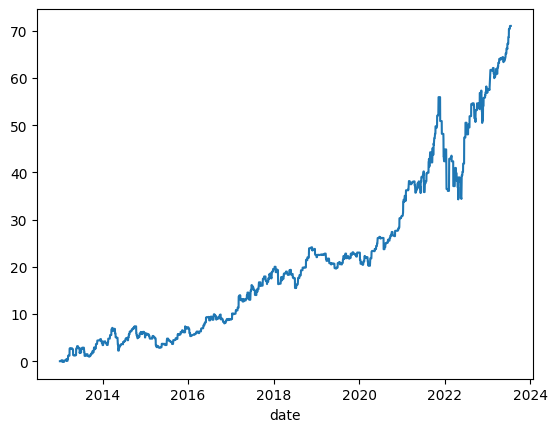

In [79]:
universe_pnl = pnl_matrix.sum(axis=1)
universe_pnl.cumsum().plot()

In [80]:
sharpe, max_dd = perf_metrics(universe_pnl)
print(f"Sharpe ratio: {sharpe}")
print(f"Max drawdown: {max_dd}")

Sharpe ratio: 0.8581970806628306
Max drawdown: 21.669999999999995


In [62]:
import optuna

def objective(trial):
    # Suggest parameters
    industry = trial.suggest_categorical('industry', valid_industries)
    delta_window = trial.suggest_int('delta_window', 1,  10)
    # rank_window = trial.suggest_int('rank_window', 5, 30)
    threshold = trial.suggest_float('threshold', 0.0, 1.0)

    # Filter data based on industry
    ticker_list = industries[industries['en_icb_name3'] == industry]['symbol'].tolist()
    available_tickers = [ticker for ticker in ticker_list if ticker in stock_universe_price.columns]
    stock_universe = stock_universe_price[available_tickers]
    stock_universe = stock_universe.ffill().fillna(0)
    stock_universe.index = pd.to_datetime(stock_universe.index)
    stock_universe.index = stock_universe.index.date
    stock_universe.index.name = 'date'

    ticker_list = industries[industries['en_icb_name3'] == industry]['symbol'].tolist()
    available_tickers = [ticker for ticker in ticker_list if ticker in stock_universe_vol.columns]
    vol = stock_universe_vol[available_tickers]
    vol = vol.fillna(0)
    vol.index = pd.to_datetime(vol.index)
    vol.index = vol.index.date
    vol.index.name = 'date'

    average_volume = vol.mean()
    sorted_tickers = average_volume.sort_values(ascending=False)
    top_3_tickers = sorted_tickers.head(3).index.tolist()
    stock_universe = stock_universe[top_3_tickers]

    stock_universe_train = stock_universe.iloc[:-252]
    stock_universe_test = stock_universe.iloc[-252:]

    # Generate orders
    order_matrix = orders(stock_universe_train, delta_window=delta_window, threshold=threshold)

    # Calculate PnL
    pnl_matrix = calculate_pnl(order_matrix, stock_universe_train)
    daily_pnl = pnl_matrix.sum(axis=1)

    # Compute performance metrics
    sharpe, max_dd = perf_metrics(daily_pnl)

    # Optuna will maximize this
    return sharpe

# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

# Filter trials with Sharpe ratio > 1
successful_trials = [trial for trial in study.trials if trial.value is not None and trial.value > 1]

# Print best parameters and best score
print(f"Best parameters: {study.best_params}")
print(f"Best score (Sharpe ratio): {study.best_value}")

# Print parameters of all successful trials
for trial in successful_trials:
    print(f"Trial {trial.number}:")
    print(f"  Value (Sharpe ratio): {trial.value}")
    print(f"  Parameters: {trial.params}")

[I 2024-08-07 10:06:21,468] A new study created in memory with name: no-name-a9d11dbf-17b2-4ac3-ab56-7af62adf95e3
[I 2024-08-07 10:06:22,158] Trial 0 finished with value: -0.02269005704989077 and parameters: {'industry': 'Financial Services', 'delta_window': 3, 'threshold': 0.950488682707537}. Best is trial 0 with value: -0.02269005704989077.
[I 2024-08-07 10:06:22,806] Trial 1 finished with value: -0.253793150909661 and parameters: {'industry': 'Media', 'delta_window': 2, 'threshold': 0.9210773860221806}. Best is trial 0 with value: -0.02269005704989077.
[I 2024-08-07 10:06:23,570] Trial 2 finished with value: 0.4779363467144043 and parameters: {'industry': 'General Retailers', 'delta_window': 8, 'threshold': 0.3877218584206319}. Best is trial 2 with value: 0.4779363467144043.
[I 2024-08-07 10:06:24,204] Trial 3 finished with value: 0.35328017044570936 and parameters: {'industry': 'Industrial Engineering', 'delta_window': 3, 'threshold': 0.23284058850170497}. Best is trial 2 with valu

Best parameters: {'industry': 'Industrial Transportation', 'delta_window': 7, 'threshold': 0.6930081714644871}
Best score (Sharpe ratio): 0.9188298873971918


### OOS

In [81]:
order_matrix = orders(stock_universe_test)
order_matrix.head()

,PVT,GMD,VOS
date,,,
2023-07-21,0,0,0
2023-07-24,0,0,0
2023-07-25,0,0,0
2023-07-26,0,1,1
2023-07-27,1,0,0


In [82]:
pnl_matrix = calculate_pnl(order_matrix, stock_universe_test)
pnl_matrix.head()           

,PVT,GMD,VOS
date,,,
2023-07-21,0.0,0.0,0.0
2023-07-24,0.0,0.0,0.0
2023-07-25,0.0,0.0,0.0
2023-07-26,0.0,0.0,0.0
2023-07-27,0.0,0.0,0.0


<Axes: xlabel='date'>

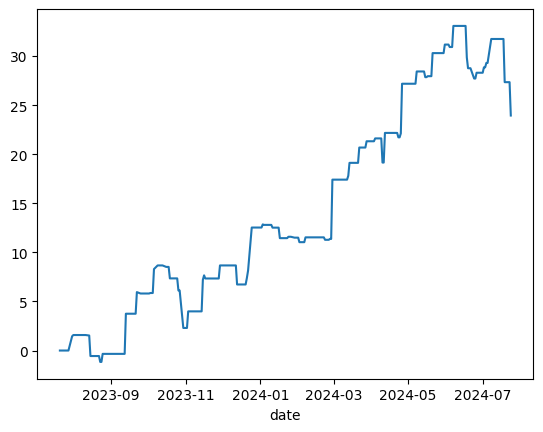

In [83]:
universe_pnl = pnl_matrix.sum(axis=1)
universe_pnl.cumsum().plot()

In [84]:
sharpe, max_dd = perf_metrics(universe_pnl)
print(f"Sharpe ratio: {sharpe}")
print(f"Max drawdown: {max_dd}")

Sharpe ratio: 1.5512503118616192
Max drawdown: 9.130000000000003
